In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import transpose
from numpy.linalg import inv

np.random.seed(0)

In [2]:
df = pd.read_csv('/content/Tr_Accelerometer(2).csv')     # csv 읽어오기
df

,time,seconds_elapsed,z,y,x,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.671420e+18,0.195983,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,1.671420e+18,0.297701,-0.064709,-0.009822,0.001054,NaN,NaN,0.000054,-0.000500,0.000003,-0.000025
2,1.671420e+18,0.399418,-0.029765,-0.008658,0.017916,NaN,NaN,0.001018,-0.001439,0.000057,-0.000124
3,1.671420e+18,0.501135,-0.021361,-0.004553,-0.002636,NaN,NaN,0.001796,-0.002111,0.000200,-0.000305
4,1.671420e+18,0.602852,-0.017267,-0.004863,0.008293,NaN,NaN,0.002083,-0.002590,0.000398,-0.000544
5,1.671420e+18,0.704570,-0.011146,-0.005478,0.009679,NaN,NaN,0.002997,-0.003116,0.000656,-0.000834
6,1.671420e+18,0.806287,-0.016958,0.001174,-0.010889,NaN,NaN,0.002936,-0.003335,0.000958,-0.001162
7,1.671420e+18,0.908004,-0.010035,0.002413,0.012521,NaN,NaN,0.003019,-0.003153,0.001261,-0.001492
8,1.671420e+18,1.009721,-0.012145,0.001856,0.001258,NaN,NaN,0.003720,-0.002935,0.001603,-0.001802
9,1.671420e+18,1.111438,-0.010190,0.001698,-0.000906,NaN,NaN,0.003737,-0.002755,0.001983,-0.002091


In [3]:
# 필요한 데이터만 추출 
df1 = df.loc[:, ['seconds_elapsed', 'y', 'x']] 
df1 

,seconds_elapsed,y,x
0,0.195983,0.000000,0.000000
1,0.297701,-0.009822,0.001054
2,0.399418,-0.008658,0.017916
3,0.501135,-0.004553,-0.002636
4,0.602852,-0.004863,0.008293
5,0.704570,-0.005478,0.009679
6,0.806287,0.001174,-0.010889
7,0.908004,0.002413,0.012521
8,1.009721,0.001856,0.001258
9,1.111438,0.001698,-0.000906


In [4]:
# tolist = 데이터프레임 array -> list 로 변환 
time = df1.loc[:,'seconds_elapsed'].tolist()    # list(df1.loc[:,'seconds_elapsed'])
dx = df1.loc[:,'x'].tolist()
dy = df1.loc[:,'y'].tolist()

In [5]:
dt=time[1]-time[0]

In [6]:
A = np.array([
    [1, dt, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, dt],
    [0, 0, 0, 1],
])

H = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

In [7]:
'''

< nummpy 대각행렬 관련 함수 >

1. np.eye
- np.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')
=> N*M 크기의 2차원 행렬을 만들어 주는 함수 -> k에 따라 시작위치가 달라짐 
=> N : Row 수(필수적 요소)
=> M : Column수(따로 설정하지 않으면 N*M의 정사각행렬이 만들어짐)
=> k : 대각 행렬이 값을 가지기 시작하는 위치 


2. np.identity
- np.identity(n, dtype=None)
=> np.eye와 크게 다를바가 없음
=> 차이 : 항상 정사각형 행렬만 만든다! 


3. np.diag
- np.diag(v, k=0)
=> 1차원과 2차원 array만을 input으로 받을 수 있음 . 3차원 이상은 오류 발생 
=> 파라미터로 전달받은 행렬의 k번째 열부터 있는 대각선의 값을 1차원 array로 반환 
  ex) np.diag(matrix, k=1) = matrix행렬의 1번 열부터 대각선 값들을 반환해줘! 
=> 2가지 기능이 존재 : 대각행렬 생성 기능, 대각요소 추출 기능
=> 대각행렬 생성 기능 : v가 1차원 배열일때, v를 대각행렬로 하는 2차원 배열을 만들어줌 
=> 대각요소 추출 기능 : v가 2차원 배열일때, v의 대각선 요소들을 1차원으로 뽑아줌   

'''

print(np.eye(4))
print(np.diag([2.0, 3.0, 1.0, 1.0]))     # 파라미터의 값을 조정할 수 있음 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[2. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [42]:
# Q와 R은 튜닝 파라미터
# Q와 R을 변경하면서 칼만 필터의 성능을 개선 할 수 있음. 
# Q = np.eye(4,2)
Q = np.diag([2.0, 4.0, 6.0, 1.0])
print(Q)

R = np.array([
    [10000, 0],
    [0, 10000]
])
print(R)

[[2. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 6. 0.]
 [0. 0. 0. 1.]]
[[10000     0]
 [    0 10000]]


In [43]:
P = 100 * Q
P

array([[200.,   0.,   0.,   0.],
       [  0., 400.,   0.,   0.],
       [  0.,   0., 600.,   0.],
       [  0.,   0.,   0., 100.]])

In [44]:
x = np.array([0, 0, 0, 0])

In [45]:
def KalmanTracking(x_, y_):
    global A, H, Q, R, P, x

    xp = A @ x
    Pp = A @ P @ transpose(A) + Q

    K = Pp @ transpose(H) @ inv(H @ Pp @ transpose(H) + R)

    z = (x_, y_)
    x = xp + K @ (z - H @ xp)
    P = Pp - K @ H @ Pp

    return x

In [46]:
def df_integral(data):  # 수치적분, 사다리꼴적분 가속도 -> 속도 -> 거리
    result = [0]

    for i in range(len(data) - 1):
        n = result[i] + ((data[i + 1] + data[i]) * (time[i + 1] - time[i]) / 2)  # 수치적분, 사다리꼴적분
        result.append(round(n, 7))
    return result

In [47]:
test_x = []
test_y = []

for i in range(len(time)):
  KalmanTracking(dx[i],dy[i])
  test_x.append(x[0])
  test_y.append(x[2])

In [48]:
x_2 = df_integral(test_x) # x 가속도 -> 속도
x_3 = df_integral(x_2) # x 속도 -> 거리

y_2 = df_integral(test_y) # y 가속도 - > 속도
y_3 = df_integral(y_2) # y 속도 -> 거리

In [49]:
df_scatter = pd.DataFrame(zip(x_3, y_3), columns=['m_y', 'm_x']) # 리스트 열단위 데이터프레임화

In [50]:
x_2 = df_integral(dx) # x 가속도 -> 속도
x_4 = df_integral(x_2) # x 속도 -> 거리

y_2 = df_integral(dy) # y 가속도 - > 속도
y_4 = df_integral(y_2) # y 속도 -> 거리

In [51]:
df2_scatter = pd.DataFrame(zip(x_4, y_4), columns=['m_y', 'm_x']) # 리스트 열단위 데이터프레임화

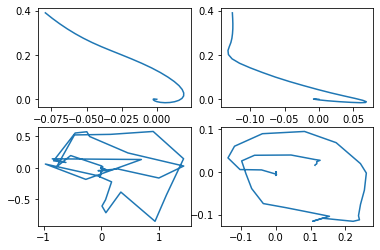

In [52]:
plt.subplot(2, 2, 1)
plt.plot(df_scatter['m_x'], df_scatter['m_y'])
plt.subplot(2, 2, 2)
plt.plot(df2_scatter['m_x'], df_scatter['m_y'])
plt.subplot(2, 2, 3)
plt.plot(dx, dy)
plt.subplot(2, 2, 4)
plt.plot(test_x,test_y)
plt.show()